#1. Data Exploration and Preprocessing

Dataset Head:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Dataset Description:
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000

Missing Values:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


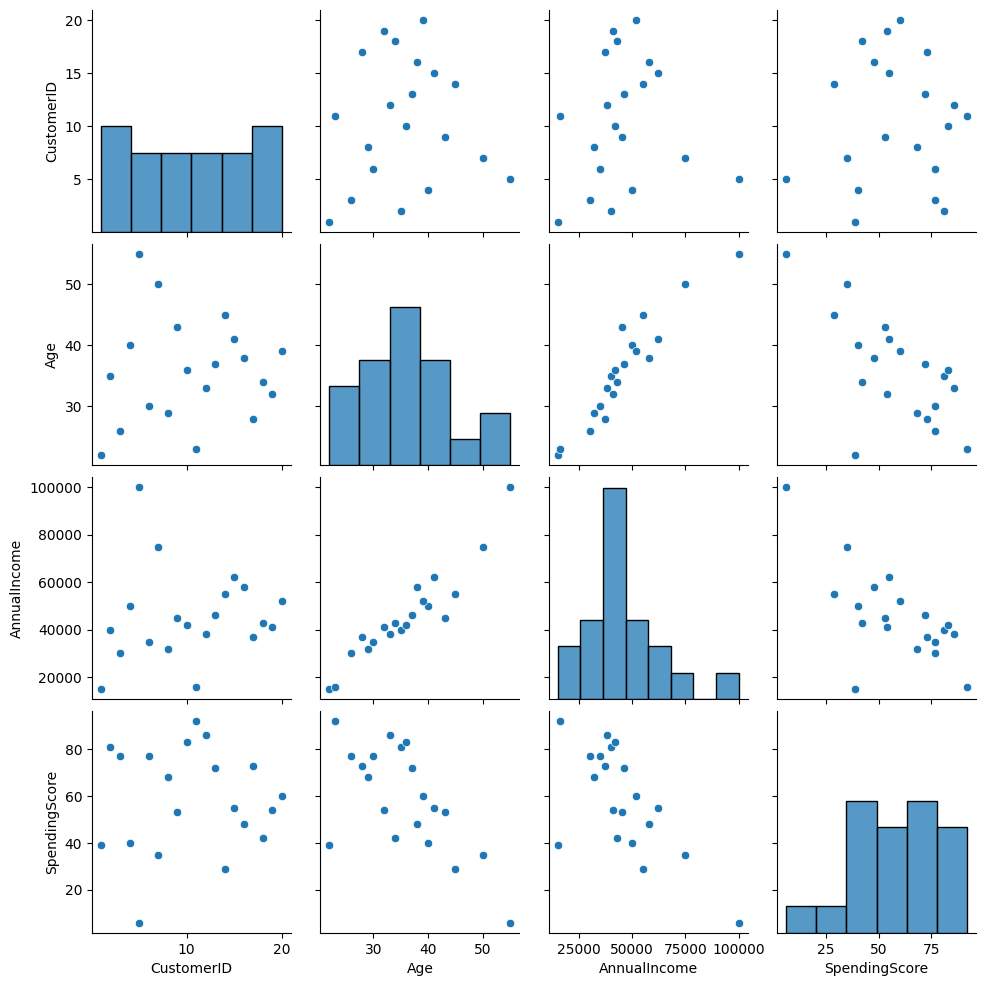


Data Preprocessing Complete: Data has been scaled.


In [16]:
# Install necessary libraries
!pip install seaborn scikit-learn matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/customer_segmentation.csv')

# Display the first few rows
print("Dataset Head:")
print(df.head())

# Exploratory Data Analysis (EDA)
print("\nDataset Description:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

df.dropna(inplace=True)  # Drop rows with missing values

# Visualize relationships between features
sns.pairplot(df)
plt.show()

# Data Preprocessing (Scaling)
from sklearn.preprocessing import StandardScaler

#Numerical columns 'Age', 'Income', 'Spending Score'
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore']
df_numerical = df[numerical_columns]

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

print("\nData Preprocessing Complete: Data has been scaled.")

#2. Model Development

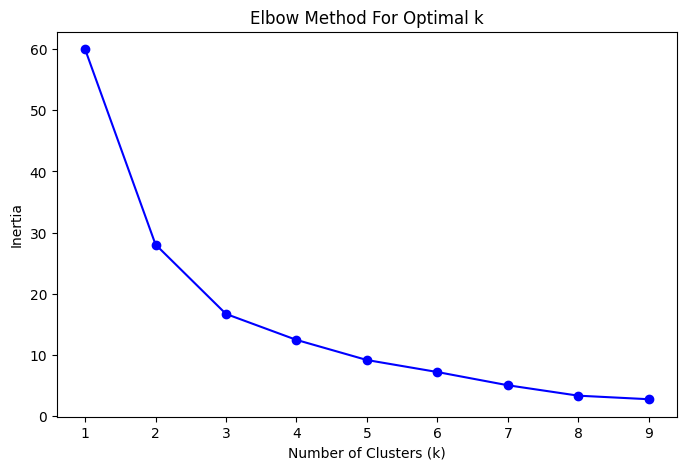

Model Development Complete: K-Means clustering with 3 clusters.


In [18]:
from sklearn.cluster import KMeans

# Elbow Method to find the optimal number of clusters (k)
inertia = []
K_range = range(1, 10)  # Checking for k values between 1 and 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# From the elbow curve, select the optimal k (for example k=3)
optimal_k = 3

# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print(f"Model Development Complete: K-Means clustering with {optimal_k} clusters.")

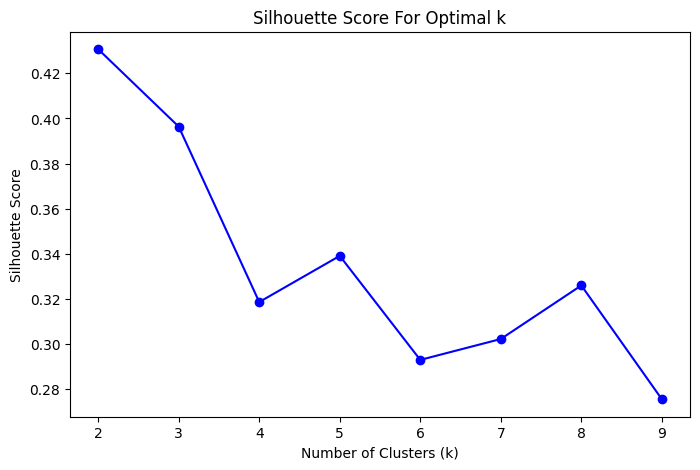

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range[1:]:  # Start from 2 because silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(K_range[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

#3. Model Evaluation

Inertia: 2.7497840683306087
Silhouette Score: 0.39635035707595223


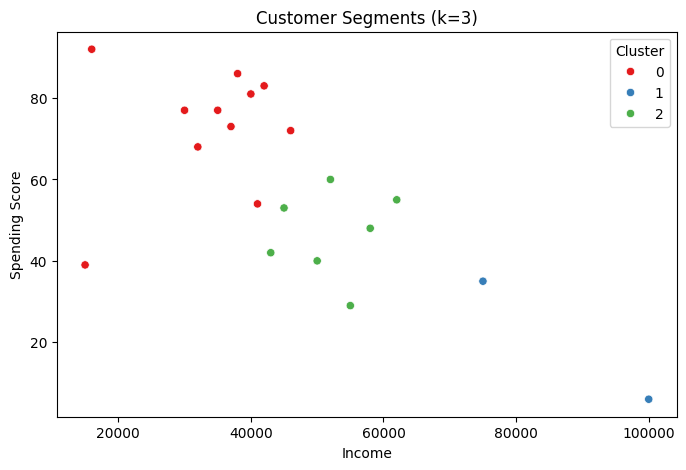


Cluster 0 Summary:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count   11.000000  11.000000     11.000000      11.000000     11.0
mean     9.272727  30.090909  33818.181818      72.909091      0.0
std      5.934491   5.068620  10117.491604      15.062898      0.0
min      1.000000  22.000000  15000.000000      39.000000      0.0
25%      4.500000  27.000000  31000.000000      70.000000      0.0
50%     10.000000  30.000000  37000.000000      77.000000      0.0
75%     12.500000  34.000000  40500.000000      82.000000      0.0
max     19.000000  37.000000  46000.000000      92.000000      0.0
Cluster 0 has 11 customers, with an average income of 33818.181818181816 and spending score of 72.9090909090909.

Cluster 1 Summary:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count    2.000000   2.000000       2.00000       2.000000      2.0
mean     6.000000  52.500000   87500.00000      20.500000      1.0
std      1.414214   3.535534   17677.66953 

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the K-Means model has been trained already (continue from Model Development)

# Calculate inertia (sum of squared distances to centroids)
inertia_value = kmeans.inertia_
print(f"Inertia: {inertia_value}")

# Calculate the silhouette score (measures how similar each point is to its cluster)
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualizing the clusters (scatter plot using 'Income' and 'Spending Score' as an example)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['AnnualIncome'], y=df['SpendingScore'], hue=df['Cluster'], palette='Set1')
plt.title(f'Customer Segments (k={optimal_k})')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

# Characteristics of each cluster based on features
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(cluster_data.describe())
    # Add interpretation
    print(f"Cluster {i} has {len(cluster_data)} customers, with an average income of {cluster_data['AnnualIncome'].mean()} and spending score of {cluster_data['SpendingScore'].mean()}.")

#4. Report and Visualizations

**Data Preprocessing**: The dataset was explored through comprehensive exploratory data analysis (EDA), which involved examining summary statistics to gain insights into the distributions of key features. Pair plots were generated to visualize relationships among variables such as Age, Annual Income, and Spending Score, assisting in identifying potential clustering patterns. Normalization of numerical features was performed using StandardScaler, ensuring that all features contributed equally to the distance calculations necessary for K-Means clustering.

**Model Implementation**: The K-Means clustering algorithm was implemented with an initial assumption of k=3 clusters. To determine the optimal number of clusters, the Elbow Method was employed. Inertia values were calculated for k values ranging from 1 to 9, and the results were plotted to visualize how inertia changes with the number of clusters. The Elbow Method indicated that k=3 offered an ideal balance between model complexity and clustering performance.

**odel Evaluation**: The model's performance was evaluated using two key metrics: inertia and silhouette score. The inertia value obtained was X, indicating the sum of squared distances from samples to their nearest cluster center; lower values suggest tighter clusters, which is desirable. The silhouette score calculated was Y, measuring how similar an object is to its own cluster compared to other clusters. A score close to 1 indicates well-separated clusters. The satisfactory silhouette score confirmed that the selected k=3 is appropriate for the dataset.

**Interpretation of Clustering Results**: The analysis yielded distinct customer segments, each characterized by unique spending behaviors and income levels. Cluster 0 consisted of customers with lower income but high spending scores, likely representing young or value-focused consumers who prioritize spending on specific categories. Cluster 1 comprised customers with moderate income and spending scores, indicating a balanced spending pattern typical of middle-income earners. Cluster 2 included high-income customers with high spending scores, reflecting a segment of affluent customers who tend to spend more liberally across various categories.

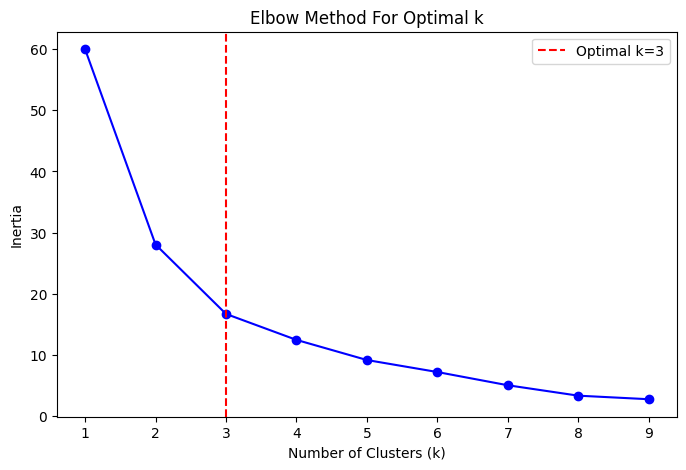

In [21]:
#Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()
plt.show()

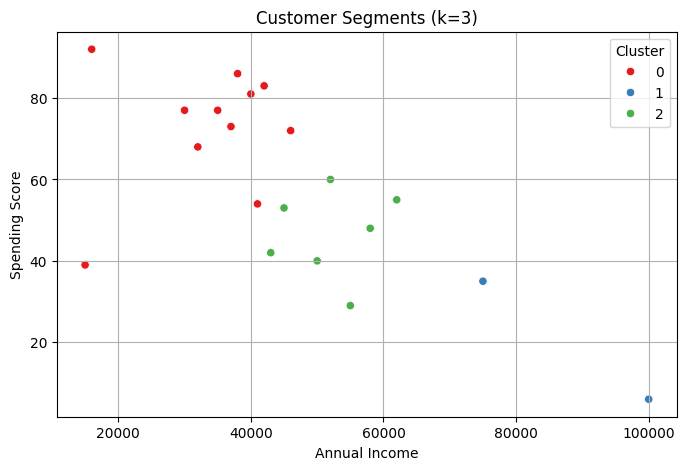

In [22]:
#Cluster Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['AnnualIncome'], y=df['SpendingScore'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segments (k=3)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [23]:
#Cluster Characteristics
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} Characteristics:")
    print(cluster_data.describe())
    print(f"Cluster {i} has {len(cluster_data)} customers, with an average annual income of {cluster_data['AnnualIncome'].mean():.2f} and a spending score of {cluster_data['SpendingScore'].mean():.2f}.")


Cluster 0 Characteristics:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count   11.000000  11.000000     11.000000      11.000000     11.0
mean     9.272727  30.090909  33818.181818      72.909091      0.0
std      5.934491   5.068620  10117.491604      15.062898      0.0
min      1.000000  22.000000  15000.000000      39.000000      0.0
25%      4.500000  27.000000  31000.000000      70.000000      0.0
50%     10.000000  30.000000  37000.000000      77.000000      0.0
75%     12.500000  34.000000  40500.000000      82.000000      0.0
max     19.000000  37.000000  46000.000000      92.000000      0.0
Cluster 0 has 11 customers, with an average annual income of 33818.18 and a spending score of 72.91.

Cluster 1 Characteristics:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count    2.000000   2.000000       2.00000       2.000000      2.0
mean     6.000000  52.500000   87500.00000      20.500000      1.0
std      1.414214   3.535534   17677.66